# 다음의 데이터를 이용하여 Logistic 회귀, Support Vector Machine 방법을 이용하여 분석하고 짧은 보고서를 작성하여라.
* Iris

In [587]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn import svm
iris = datasets.load_iris() # 분꽃
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [588]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [589]:
target=iris.target

In [590]:
target_name=iris.target_names # 3종류의 분꽃 분류하기

In [591]:
names=iris.feature_names 
# sepal : 꽃받침
# petal : 꽃잎

## Logistic Regression

In [592]:
data=iris.data
sel_=np.random.choice(data.shape[0],int(data.shape[0]*0.2))

data_train=np.delete(data,sel_,0)
target_train=np.delete(target,sel_,0)

data_test=data[sel_]
target_test=target[sel_]

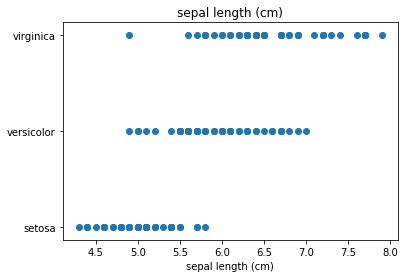

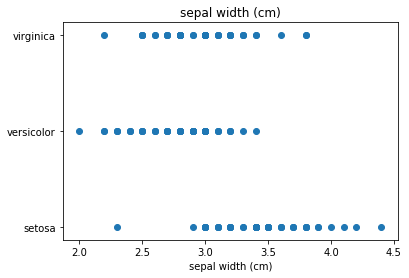

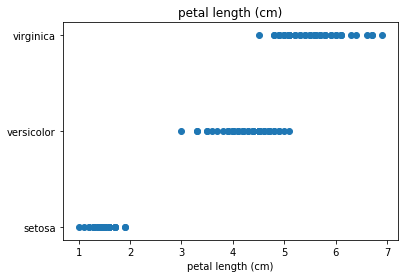

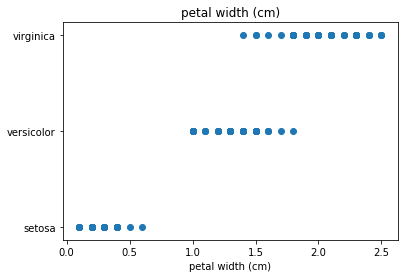

In [593]:
for idx,dat in enumerate(np.transpose(data)):
    plt.figure(names[idx])
    plt.title(names[idx])
    plt.xlabel(names[idx])
    plt.yticks([0,1,2],iris.target_names)
    plt.scatter(dat,target)

plt.show()

어떤 feature가 로지스틱 회귀에 적합한지 확인하기 위해서 그래프를 그려보았다. 그랬을때, 겹치는 구간이 많은 sepal width, sepal length에서 virginica와 versicolor는 로지스틱에 부적합해보인다.
 분류학에서 분류하는 방식을 생각해보면, 주로 형질에 대한 형질상태는 평균값으로 보고, variance 은 주로 1 표준편차 정도로 잡는다. 그런 형질들의 형질상태의 조합으로 보통 종을 동정한다. 따라서 feature만큼의 차원을 가지고, 그 값은 1,2,3으로 가지는 형태, 즉, $(f_{1},f_{2},f_{3},f_{4}), f_{i}\in (se,ve,vi)$ 인 것이 분류에 적합하다고 본다. 이때 logistic regression은 형질 상태를 결정하는데 이용될 수 있을 것 같다.
 형질 상태를 각각의 class에 따라 나누었기에, 이 데이터에서는 총 3개의 결과값이 필요하다. 그러나 logistic은 True, False, A 아니면 B 같은 형식을 다룬다. 그렇기에 3개의 결과값을 내기 위해서 최소 2개의 logistic regression이 필요하다. 따라서 class 1 vs class 2, class 2 vs class 3에 대한 logistic regression을 하였다. 또한, logistic은 단조증가(감소)형식의 데이터를 잘 다루므로, 적어도 class들의 평균값이 증가하는 형식으로 비교를 해야할 것이다. 이를 위해서 데이터를 class 별로 나누고, 평균을 내어 크기 순으로 배열한 뒤에, 작은 평균값 class vs 중간 평균값 class, 중간 평균값 class vs 큰 평균값 class로 나누어서 진행할 것이다. 여기서 중간 크기의 평균값을 가지는 class는 총 2개의 결과값으로 나오는데 이는, 두 값 중에 작은 것을 선택하기로 하였다. (평균을 내면, 50% 이상의 값만을 가진다는 단점이 생긴다.)  
 이렇게 logistic regression 한 결과는 한 형질의 형질상태를 P(class)으로 나타낼 수 있게 하고, 어떤 한 개체는 순서쌍 $(\sum{i\cdot P_{i}},\sum{i\cdot P_{i}},\sum{i\cdot P_{i}},\sum{i\cdot P_{i}})$로 나타낼 수 있을 것이다. 그 후에 순서쌍들에 대한 기대값을 다시 구하여서 $\sum_{i}{P_{i}\cdot (target)}$을 하고, 정수로 반올림하는 것으로 class를 예측하겠다.

$$ Individual \to (f_{1},f_{2},f_{3},f_{4}) \to (\sum_{i}{i \cdot P_{1}(i)},\sum_{i}{i \cdot P_{2}(i)},\sum_{i}{i \cdot P_{3}(i)},\sum_{i}{i \cdot P_{4}(i)}) \to {Round \, Aver.} \to Class \, x  $$

In [594]:
log_reg=LogisticRegression(solver='lbfgs')

In [595]:
# array 데이터 안에서 행 혹은 열을 기준으로 크기 순위를 메기고 반환하는 함수.
def rank(A,axis=0):
    num=np.shape(A)[axis]
    out=np.ones(np.shape(A))
    if axis==0:
        for idx,dat in enumerate(A):
            order_=np.argsort(dat)
            for jdx,order in enumerate(order_):
                out[idx,order]=jdx
    elif axis==1:
        for idx,dat in enumerate(np.transpose(A)):
            order_=np.argsort(dat)
            for jdx,order in enumerate(order_):
                out[order,idx]=jdx
    return out

In [596]:
data_se=data_train[target_train == 0]
data_ve=data_train[target_train == 1]
data_vi=data_train[target_train == 2]
data_=[data_se,data_ve,data_vi]

means_se=np.average(data_se,axis=0)
means_ve=np.average(data_ve,axis=0)
means_vi=np.average(data_vi,axis=0)
means=np.array([means_se,means_ve,means_vi])

In [597]:
order=rank(means,axis=1)
print(order)

[[0. 2. 0. 0.]
 [1. 0. 1. 1.]
 [2. 1. 2. 2.]]


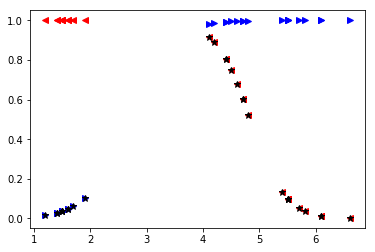

In [651]:
f_=[]

for idx,ran in enumerate(np.transpose(order)):
    if idx ==2 or idx ==3:
    
        dat_fir=data_[list(ran).index(0)][:,idx]
        dat_sec=data_[list(ran).index(1)][:,idx]
        dat_thr=data_[list(ran).index(2)][:,idx]
    
        test_=[[i] for i in data_test[:,idx]]
        #train_=[[i] for i in data_train[:,idx]] # 테스트용
    
        log_data=[[i] for i in np.append(dat_fir,dat_sec)]
        log_target=list(np.append(np.ones(len(dat_fir))*0,np.ones(len(dat_sec))*1))
        log_reg.fit(log_data,log_target)
        P1=log_reg.predict_proba(test_)[:,0]
        P2_1=1-P1

        log_data=[[i] for i in np.append(dat_sec,dat_thr)]
        log_target=list(np.append(np.ones(len(dat_sec))*0,np.ones(len(dat_thr))*1))
        test_=[[i] for i in data_test[:,idx]]
        log_reg.fit(log_data,log_target)
        P2_2=log_reg.predict_proba(test_)[:,0]
        P3=1-P2_2

        f_.append(list(ran).index(0)*P1
                  +list(ran).index(1)*(P2_1*(P2_1<=P2_2)+P2_2*(P2_2<P2_1))
                  +list(ran).index(2)*P3)
        #logistic regression 결과 확인용
        if idx==2:
            #plt.plot(test_,P1,'o')
            plt.plot(test_,P2_1,'b>')
            plt.plot(test_,P2_2,'r<')
            #plt.plot(test_,P3,'o')
            plt.plot(test_,(P2_1*(P2_1<=P2_2)+P2_2*(P2_2<P2_1)),'k*',markersize=7) 
            plt.show()

f_=np.transpose(f_)

In [579]:
result=np.around(np.average(f_,axis=1)).astype(int)

print("predicted result: ", result)
print("test target data: ", target_test)
print('Hit rate: ',np.sum(result==target_test)/len(result)*100,"%")

predicted result:  [0 1 0 1 1 0 2 0 0 0 1 0 0 0 1 2 2 2 2 1 2 0 1 2 1 1 0 0 2 0]
test target data:  [0 1 0 2 1 0 2 0 0 0 1 0 0 0 1 2 2 2 2 1 2 0 1 2 1 1 0 0 2 0]
Hit rate:  96.66666666666667 %


각 feature 선택에 따른 적중률 비교. (각각의 경우마다 20번정도 시행함.)

All feature : 최대 100% ~ 최소 73%, 주로 83%, 안정적인 적중률.

All without sepal length : 최대 96% ~ 최소 70%, 적중률 변동이 심함.

All without sepal width : 최대 100% ~ 최소 90%, 최소 90% 이상의 적중률

All without petal length : 최대 83% ~ 최소 43%, 변동이 심하고, 적중률이 떨어짐.

All withoput petal width : 최대 80% ~ 최소 53%, 주로 60~70% 정도의 적중률

sepal length, sepal width : 최대 60% ~ 최소 30%, 주로 50% 이하의 적중률을 보임.

sepal length, petal length : 최대 96% ~ 최소 73%, 주로 80% 이상의 적중률을 보임.

sepal length, petal width : 최대 100% ~ 최소 80%, 주로 90%를 주지만, 적지 않게 80%의 적중률을 보여줌.

sepal width, petal length : 최대 83% ~ 최소 60%, 적중률 변동이 심함.

sepal width, petal width : 최대 90% ~ 최소 53%, 적중률 변동이 심함.

petal length, petal width : 최대 100% ~ 최소 93%, 적중률이 100% 혹은 96%가 주로 나옴. 매우 정확.

sepal length: 최대 73% ~ 최소 43%, 주로 60~70% 정도의 적중률.

sepal width: 최대 50% ~ 최소 23%, 주로 30~40%의 적중률. 찍는 것이 33%이기에 이와 유사.

petal length : 최대 100% ~ 최소 83%, 주로 90% 이상의 적중률.

petal width: 최대 100% ~ 최소 90%, 해당 구간에서 변동이 큼.

 한 20번 정도 씩 train data와 test data를 섞어서 모든 feature 조합에서 시도해 본 결과, 모든 feature를 가지고 동정하는 것은 적중률이 안정적이기는 하지만 83%로 그 수치가 매우 애매하다. 각각 feature에서 적중률이 떨어지는 sepal length와 septal width를 빼고 동정하는 것이 적중률 못해도 93%로 매우 높다. 따라서 Logistic regression을 이용해서 iris dataset을 분석하는 데는 petal length와 petal width만을 사용하는 것이 제일 적합하다.
 한편, 위 DATA에 대한 Description에서처럼 sepal width, sepal length는 종 연관성이 매우 낮은 것 같다. 이를 분류학적으로 생각해보면, sepal width는 세 종에 대한 공유파생형질이고, 종 연관성이 높은 petal witdh와 petal length는 고유파생형질로 보여진다. 이를 미루어 보았을때, iris 세 종들은 sepal width에 대한 공유파생형질을, versicolor와 virginica는 septal width에 대한 공유파생형질을, 각각 종은 petal width와 petal length에 대한 고유파생형질을 가지고 있는 것 같다.

┌--┌vericolor

│  └virginica

└----setosa

## Support Vector Machinem

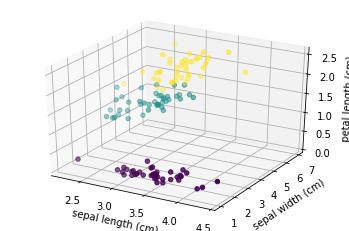

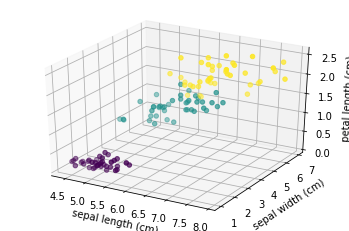

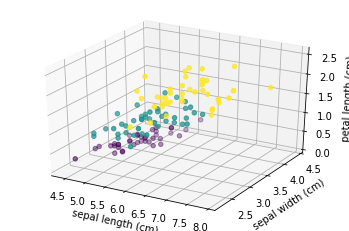

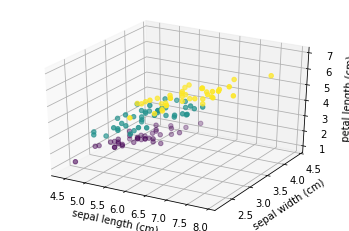

In [580]:
for idx in range(4):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(*np.transpose(np.delete(data_train,idx,1)),c=target_train)
    # setosa=0, versicolor=1, virginica=2
    ax.set_xlabel(nam[0])
    ax.set_ylabel(nam[1])
    ax.set_zlabel(nam[2])

3차원 그래프를 보았을 때, sepal length를 제외한 것과 sepal width를 제외한 데이터가 평면을 통해 분류하기 적합해보인다. 이는 위의 logsitic regression의 판단과 동일하다. logstic regression과 달리 SVM은 multiclass 분류도 가능하기에 그대로 적용하겠다.

In [581]:
svc = svm.SVC(kernel='linear',gamma='auto')
rbf_svc=svm.SVC(kernel='rbf',gamma='auto')
poly_svc = svm.SVC(kernel='poly', gamma='auto', degree=3)
lin_svc=svm.LinearSVC(max_iter=5000)

In [582]:
svc_hit=[]
rbf_hit=[]
poly_hit=[]
lin_hit=[]

for ite in range(1000):
    sel_=np.random.choice(data.shape[0],int(data.shape[0]*0.2))
    # 0: sepal length  1: sepal width  2: petal length  3: petal width 
    data_train=np.delete(data,sel_,0)[:,[0,1,2,3]]
    target_train=np.delete(target,sel_,0)

    data_test=data[sel_][:,[0,1,2,3]]
    target_test=target[sel_]
    
    rbf_svc.fit(data_train,target_train)
    lin_svc.fit(data_train,target_train)
    svc.fit(data_train,target_train)
    poly_svc.fit(data_train,target_train)
    
    svc_hit.append(sum(svc.predict(data_test)==target_test)/len(target_test)*100)
    rbf_hit.append(sum(rbf_svc.predict(data_test)==target_test)/len(target_test)*100)
    poly_hit.append(sum(poly_svc.predict(data_test)==target_test)/len(target_test)*100)
    lin_hit.append(sum(lin_svc.predict(data_test)==target_test)/len(target_test)*100)

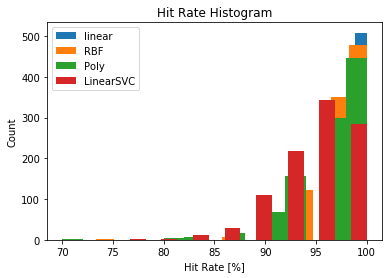

SVC linear Hit rate Average:	 97.71666666666667 %
SVC RBF Hit rate Average:	 97.49 %
SVC Poly Hit rate Average:	 96.81 %
LinearSVC Hit rate Average:	 95.65 %


In [583]:
plt.figure('Hit Rate Histogram')
plt.hist(svc_hit,bins=15,label='linear')
plt.hist(rbf_hit,bins=15,label='RBF')
plt.hist(poly_hit,bins=15,label='Poly')
plt.hist(lin_hit,bins=15,label='LinearSVC')
plt.title('Hit Rate Histogram')
plt.xlabel('Hit Rate [%]')
plt.ylabel('Count')
plt.legend()
plt.show()

print("SVC linear Hit rate Average:\t",np.average(svc_hit),'%')
print("SVC RBF Hit rate Average:\t",np.average(rbf_hit),'%')
print("SVC Poly Hit rate Average:\t",np.average(poly_hit),'%')
print("LinearSVC Hit rate Average:\t",np.average(lin_hit),'%')

데이터의 80%를 랜덤하게 1000번 뽑아서 SVM에 fitting 하고, SVM가 test data를 예측한 적중률을 histogram으로 그렸다. 여기서 iris에 대해서 흔히 사용하는 4개의 kernel에 대해서 비교해보았다. 그랬을 때, SVM에 단순히 linear kernel로 하는 것이 제일 좋은 결과를 주었다. 그 외에도 왠만한 logistic regression 보다 좋은 분류 결과를 보여주었다. linear > RBF > poly > LinearSVC 순으로 좋은 적중률을 보여주었다.
 logistic regression에서 좋은 결과를 주었던 petal lenth와 petal width 만으로 다시 fiting을 해보면 더 좋은 결과를 줄지 확인해보겠다.

## - Hit rate for all case
###### For All features) [0,1,2,3]
SVC linear Hit rate Average:	 97.59 % \
SVC RBF Hit rate Average:	 97.22666666666667 %\
SVC Poly Hit rate Average:	 96.57666666666667 %\
LinearSVC Hit rate Average:	 95.24333333333334 %
###### For All without sepal length) [1,2,3]
SVC linear Hit rate Average:	 96.25333333333334 %\
SVC RBF Hit rate Average:	 96.76 %\
SVC Poly Hit rate Average:	 95.13 %\
LinearSVC Hit rate Average:	 94.78333333333335 %
###### For All without sepal width) [0,2,3]
SVC linear Hit rate Average:	 96.91666666666667 %\
SVC RBF Hit rate Average:	 96.87 %\
SVC Poly Hit rate Average:	 96.61666666666667 %\
LinearSVC Hit rate Average:	 94.25 %
###### For All without petal length) [0,1,3]
SVC linear Hit rate Average:	 95.12333333333333 %\
SVC RBF Hit rate Average:	 95.47000000000001 %\
SVC Poly Hit rate Average:	 93.93333333333332 %\
LinearSVC Hit rate Average:	 92.09333333333335 %
###### For All without petal width) [0,1,2]
SVC linear Hit rate Average:	 95.59666666666668 %\
SVC RBF Hit rate Average:	 95.43333333333334 %\
SVC Poly Hit rate Average:	 94.81666666666668 %\
LinearSVC Hit rate Average:	 93.89 %
###### For sepal length, sepal width) [0,1]
SVC linear Hit rate Average:	 80.02666666666667 %\
SVC RBF Hit rate Average:	 79.81333333333333 %\
SVC Poly Hit rate Average:	 78.66333333333333 %\
LinearSVC Hit rate Average:	 77.84333333333333 %
###### For sepal length, petal length) [0,2]
SVC linear Hit rate Average:	 95.34666666666668 %\
SVC RBF Hit rate Average:	 95.09333333333335 %\
SVC Poly Hit rate Average:	 94.9 %\
LinearSVC Hit rate Average:	 94.15666666666667 %
###### For sepal length, petal width) [0,3]
SVC linear Hit rate Average:	 95.34666666666668 %\
SVC RBF Hit rate Average:	 95.62333333333333 %\
SVC Poly Hit rate Average:	 95.29333333333334 %\
LinearSVC Hit rate Average:	 90.89333333333335 %
###### For sepal width, petal length) [1,2]
SVC linear Hit rate Average:	 95.34333333333335 %\
SVC RBF Hit rate Average:	 95.27333333333334 %\
SVC Poly Hit rate Average:	 95.08333333333334 %\
LinearSVC Hit rate Average:	 94.25666666666667 %

###### For sepal width, petal width) [1,3]
SVC linear Hit rate Average:	 95.74666666666668 %\
SVC RBF Hit rate Average:	 95.83 %\
SVC Poly Hit rate Average:	 94.46333333333334 %\
LinearSVC Hit rate Average:	 93.88666666666666 %
###### For petal length, petal width) [2,3]
SVC linear Hit rate Average:	 96.38333333333333 %\
SVC RBF Hit rate Average:	 96.36 %\
SVC Poly Hit rate Average:	 95.21666666666667 %\
LinearSVC Hit rate Average:	 92.39 %
###### For sepal length) [0]
SVC linear Hit rate Average:	 72.35333333333332 %\
SVC RBF Hit rate Average:	 72.23666666666665 %\
SVC Poly Hit rate Average:	 71.38333333333334 %\
LinearSVC Hit rate Average:	 63.56666666666666 %
###### For sepal length) [1]
SVC linear Hit rate Average:	 53.49 %\
SVC RBF Hit rate Average:	 53.06 %\
SVC Poly Hit rate Average:	 54.91 %\
LinearSVC Hit rate Average:	 54.55 %
###### For sepal length) [2]
SVC linear Hit rate Average:	 95.14333333333333 %\
SVC RBF Hit rate Average:	 95.1 %\
SVC Poly Hit rate Average:	 94.64333333333335 %\
LinearSVC Hit rate Average:	 89.30666666666667 %
###### For sepal length) [3]
SVC linear Hit rate Average:	 95.88333333333334 %\
SVC RBF Hit rate Average:	 96.07 %\
SVC Poly Hit rate Average:	 96.06 %\
LinearSVC Hit rate Average:	 91.27666666666667 %

모든 가능한 feature 조합에 대해서 해보았다. 그 결과 예상과 달리, (petal length, petal width) 조합의 데이터의 성능이 모든 조합을 한 경우보다 성능이 좋지 않았다. 따라서 SVM의 성능은 다음과 같은 요인에 의해서 결정되는 것 같다. 하나는 해당 feature와 target class 간의 연관성, 나머지 하나는 data의 차원 수이다. 특히 (petal length, petal width)와 (sepal length,petal length, petal width),(sepal width,petal length, petal width), All features를 보자. 그러면 petal length와 petal width가 class와의 연관성이 높음기에, 연관성이 적은 feature가 포함되면 오히려 적중률이 떨어질 것 같다. 그러나 차원의 수가 높은 위 3개는 (petal length, petal width) 조합보다 적중률이 높다. 즉, 연관성이 작더라도 feature의 수를 늘리는 것이 SVM의 성능을 증가시킨다는 것이다.
 이는 다음과 같이 이해된다. 차원을 줄이면, 겹치는 현상이 발생한다. 나뭇가지와 가지가 만드는 그림자를 보면, 3차원 공간에서 나뭇가지는 서로 겹치지 않고 잘 펴져 있다. 그러나 그 그림자를 보면 서로 겹쳐있다. 즉, 차원을 늘리는 것이 데이터가 특정 공간에 겹치는 것을 막아서 더 잘 분류하는 초평면(hyperplane)을 찾을 수 있게 해준다. 같은 이유로 kernel 또한 공간을 휘는 것으로 차원을 높여서 분류를 용이하게 하는 것이라고 볼 수 있다. 따라서 모든 features를 이용해서 SVM하는 것이 제일 적중률이 높다. 그 중에서 iris dataset은 "kernel=linear"로 하는 것이 제일 좋은 적중률을 보여준다. 이는 대부분의 feature 조합에서도 마찬가지다.

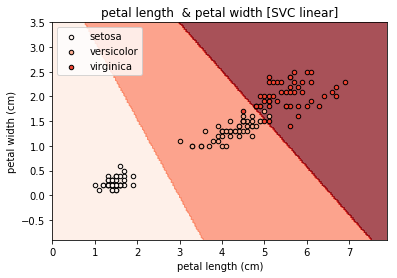

SVC linear  score: 0.9666666666666667


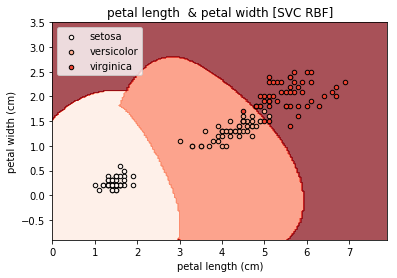

SVC RBF  score: 0.9666666666666667


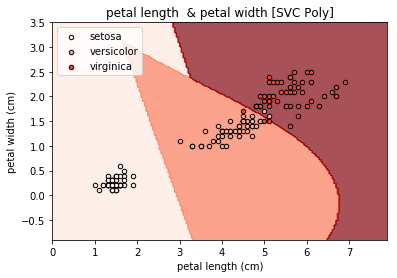

SVC Poly  score: 0.96


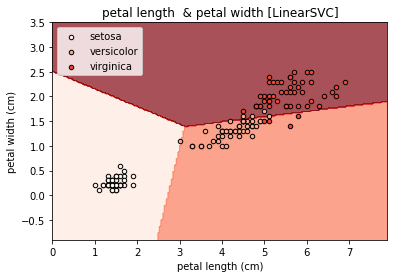

LinearSVC  score: 0.94


In [584]:
sel=[2,3]
feature=data[:,sel]
x=np.linspace(np.min(feature[:,0])-1,np.max(feature[:,0])+1,200)
y=np.linspace(np.min(feature[:,1])-1,np.max(feature[:,1])+1,200)
xs,ys= np.meshgrid(x,y)
xy=np.c_[xs.ravel(),ys.ravel()]

features=[feature[target == 0],feature[target == 1],feature[target == 2]]
titles=['SVC linear','SVC RBF','SVC Poly', 'LinearSVC']

for idx,clf in enumerate([svc,rbf_svc,poly_svc,lin_svc]):
    
    clf.fit(feature,target)
    clf_c=clf.predict(xy).reshape(xs.shape)
    
    plt.figure(titles[idx])
    plt.contourf(xs,ys,clf_c,cmap=plt.cm.Reds, alpha=0.7)
    for jdx,scat in enumerate(features):
        plt.scatter(*np.transpose(scat),color=plt.cm.Reds(0.3*jdx), s=20, edgecolors='k',label=target_names[jdx])
    plt.title(str(names[sel[0]][:-4])+' & '+str(names[sel[1]][:-4])+'['+titles[idx]+']')
    plt.xlabel(names[sel[0]]);plt.ylabel(names[sel[1]])
    plt.legend()
    plt.show()
    
    print( titles[idx], ' score:',clf.score(feature,target))

위 그래프를 보면 각 SVM이 분류를 하는 영역을 보면, 상당히 다른 것을 알 수 있다. 적중률이 높은 SVC linear과 SVC RBF를 비교해보면, SVC RBF는 기준선의 위치가 비슷하지만, Virginica가 분류되는 범위를 필요 이상으로 넓게 잡았다. 따라서 영역을 적절한 비율로 잡은 SVC linear가 iris dataset에 대해서 더 좋은 성능을 보이는 것 같다.